In [1]:
import torch
from datetime import datetime
import matplotlib.pyplot as plt
from model import SparseNN


In [2]:
def test_inf(count, model_d, low, sparse):
    model = SparseNN(784, 10, 0.001, model_d, low, sparse)
    inputs = torch.rand([count, 28, 28])
    start = datetime.now()
    for e in inputs:
        model.predict_step(e)
    time_s = datetime.now() - start
    return time_s, f"# {count}-{model_d}-{low}-{sparse} : {time_s}"

In [4]:

count = 100
range_low = 100
range_high = 3000
range_step = 100

timesa = [test_inf(count, i, None, None)[0].total_seconds()*1000/count for i in range(range_low, range_high, range_step)]
timesb = [test_inf(count, i, int(i*4*0.02), int(i*4*0.02))[0].total_seconds()*1000/count for i in range(range_low, range_high, range_step)]


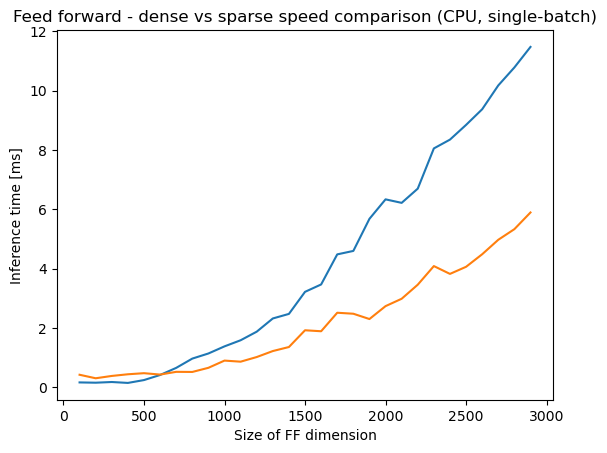

In [5]:
y = list(range(range_low, range_high, range_step))
plt.plot(y, timesa, label="fully connected")  # Plot the chart
plt.plot(y, timesb, label="sparse")  # Plot the chart
plt.xlabel("Size of FF dimension")
plt.ylabel("Inference time [ms]")
plt.title("Feed forward - dense vs sparse speed comparison (CPU, single-batch)")
plt.savefig("ex.png")
plt.show()

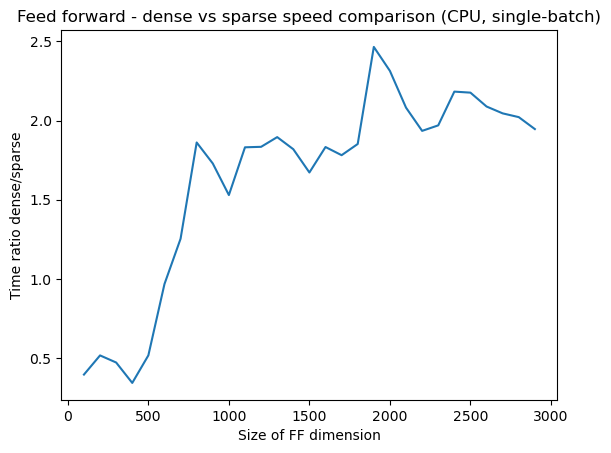

In [8]:

timec = [a/b for a, b in zip(timesa, timesb)]

plt.plot(y, timec, label="fully connected")  # Plot the chart
plt.xlabel("Size of FF dimension")
plt.ylabel("Time ratio dense/sparse")
plt.title("Feed forward - dense vs sparse speed comparison (CPU, single-batch)")
plt.savefig("ex_ratio.png")
plt.show()



In [11]:

tos = {
    "timea":timesa,
    "timeb":timesb,
    "timec":timec
}

import json 

with open("data.json", "w") as f:
    json.dump(tos,f)